##  Linear Regression

Create a notebook and perform the following tasks on this week’s bikes dataset:

1. Load the data in a pandas dataframe
2. Set the datetime column as the dataframe index
3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count
4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?
5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.
6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?
7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?
8. What additional features can be added to improve the fit of the model ?

#### BONUS

Use features that were extracted and binned in the datetime lesson to improve the 
r² score even further.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm

####  1. Load the data in a pandas dataframe
#### 2. Set the datetime column as the dataframe index

In [2]:
df = pd.read_csv('../data/dc_bikes.csv',parse_dates=True, index_col=0)

In [3]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


#### 3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count

In [4]:
subset_df = df[['temp', 'atemp', 'humidity', 'windspeed','count']]
subset_df

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


#### 4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?

<Axes: >

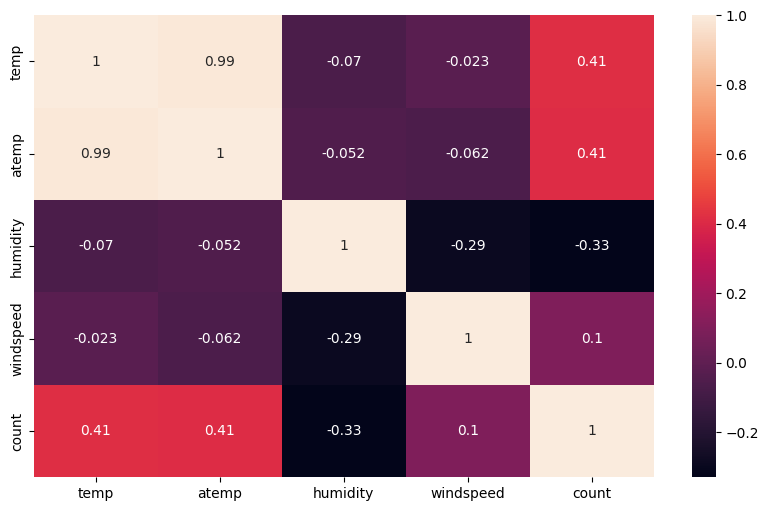

In [5]:
plt.figure(figsize=(10, 6))  
sns.heatmap(subset_df.corr(), annot =True)

#### 5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.

In [6]:
model = sm.ols(formula='count ~ temp', data=subset_df).fit()  # create an instance of a linear regression model and fit the model

In [7]:
model.params

Intercept   -1.502696
temp         9.330142
dtype: float64

In [ ]:
# plt.subplots(figsize=(8,6))
# plt.scatter(x=subset_df['temp'], 
#             y=subset_df['count'])
# plt.plot(subset_df['temp'], model.params["temp"]*subset_df['temp'] + model.params["Intercept"], c='r');

In [8]:
#calculate r2
model.rsquared_adj

0.17193951437174182

#### 6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?

In [10]:
model_1 = sm.ols(formula='count ~ temp + humidity', data=subset_df).fit()

In [11]:
model_1.params

Intercept    182.625909
temp           8.855172
humidity      -2.781288
dtype: float64

In [12]:
model_1.rsquared_adj

0.26272656761508717

#### 7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?

In [13]:
model_2 = sm.ols(formula='count ~ temp + humidity +  atemp + windspeed', data=subset_df).fit()

In [14]:
model_2.params

Intercept    155.215146
temp           0.902444
humidity      -2.738443
atemp          7.422851
windspeed      0.800181
dtype: float64

In [15]:
model_2.rsquared_adj

0.2660961247219641

#### BONUS
Use features that were extracted and binned in the datetime lesson to improve the r² score even further.

In [16]:
df2 = pd.read_csv('../data/bike_dataset_new.csv',parse_dates=['datetime'])
df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,day,year,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,1,2011,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,1,2011,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,1,2011,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,1,2011,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,31,2012,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,31,2012,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,31,2012,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,31,2012,night


In [17]:
subset_df2 = df2[['temp', 'atemp', 'humidity', 'windspeed','count','hour', 'weekday', 'day', 'part_of_day', 'season']]
subset_df2

,temp,atemp,humidity,windspeed,count,hour,weekday,day,part_of_day,season
0,9.84,14.395,81,0.0000,16,0,5,1,morning,1
1,9.02,13.635,80,0.0000,40,1,5,1,morning,1
2,9.02,13.635,80,0.0000,32,2,5,1,morning,1
3,9.84,14.395,75,0.0000,13,3,5,1,morning,1
4,9.84,14.395,75,0.0000,1,4,5,1,morning,1
...,...,...,...,...,...,...,...,...,...,...
17374,10.66,12.880,60,11.0014,156,19,0,31,evening,1
17375,10.66,12.880,60,11.0014,104,20,0,31,evening,1
17376,10.66,12.880,60,11.0014,67,21,0,31,night,1
17377,10.66,13.635,56,8.9981,43,22,0,31,night,1


In [18]:
model_3 = sm.ols(formula='count ~ temp + humidity +  hour  + weekday  ', data=subset_df2).fit()

In [19]:
model_3.params

Intercept    57.679658
temp          8.105159
humidity     -2.052765
hour          7.466319
weekday       2.763480
dtype: float64

In [20]:
model_3.rsquared

0.3404681917027894

In [21]:
model_4 = sm.ols(formula='count ~ season + temp  + hour + day + part_of_day  ', data=subset_df2).fit()

In [22]:
model_4.params

Intercept                -190.219109
part_of_day[T.evening]    -56.114510
part_of_day[T.morning]     36.234320
part_of_day[T.night]     -296.994256
season                     17.946580
temp                        6.250593
hour                       20.873241
day                        -0.611851
dtype: float64

In [23]:
model_4.rsquared

0.46446594812759

Improved the r² score to **0.464** from **0.266** if we also consider season, day, part_of_day and hour

In [24]:
x= subset_df2['hour']
y=subset_df2['count']

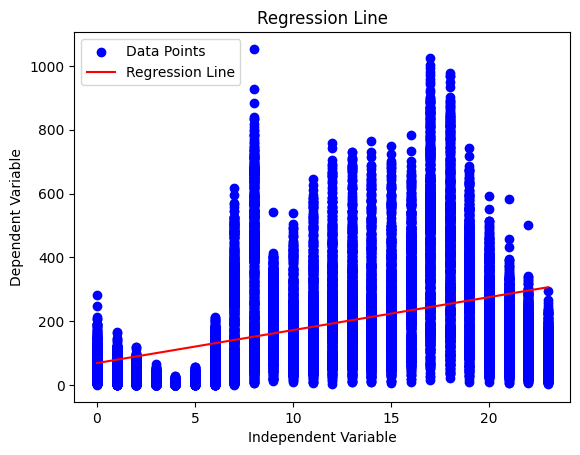

In [25]:
regression_line = np.polyfit(x, y, deg=1)
x_values = np.linspace(min(x), max(x), 100)
y_values = np.polyval(regression_line, x_values)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Regression Line')
plt.legend()
plt.show()